In [ ]:
!pip install pandas
!pip install statsmodels

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sales = pd.read_csv('data/Daily net retail sales 5 May 2000  6 April 2003.csv', index_col=0)

In [19]:
sales["x"] = sales["x"].fillna(sales["x"].mean())
sales.head()

,x
1,257209.361963
2,257209.361963
3,257209.361963
4,201468.000000
5,284033.000000


In [20]:
sales.describe()

,x
count,1067.000000
mean,257209.361963
std,130130.643359
min,101105.000000
25%,176416.500000
50%,217989.000000
75%,276230.500000
max,986587.000000


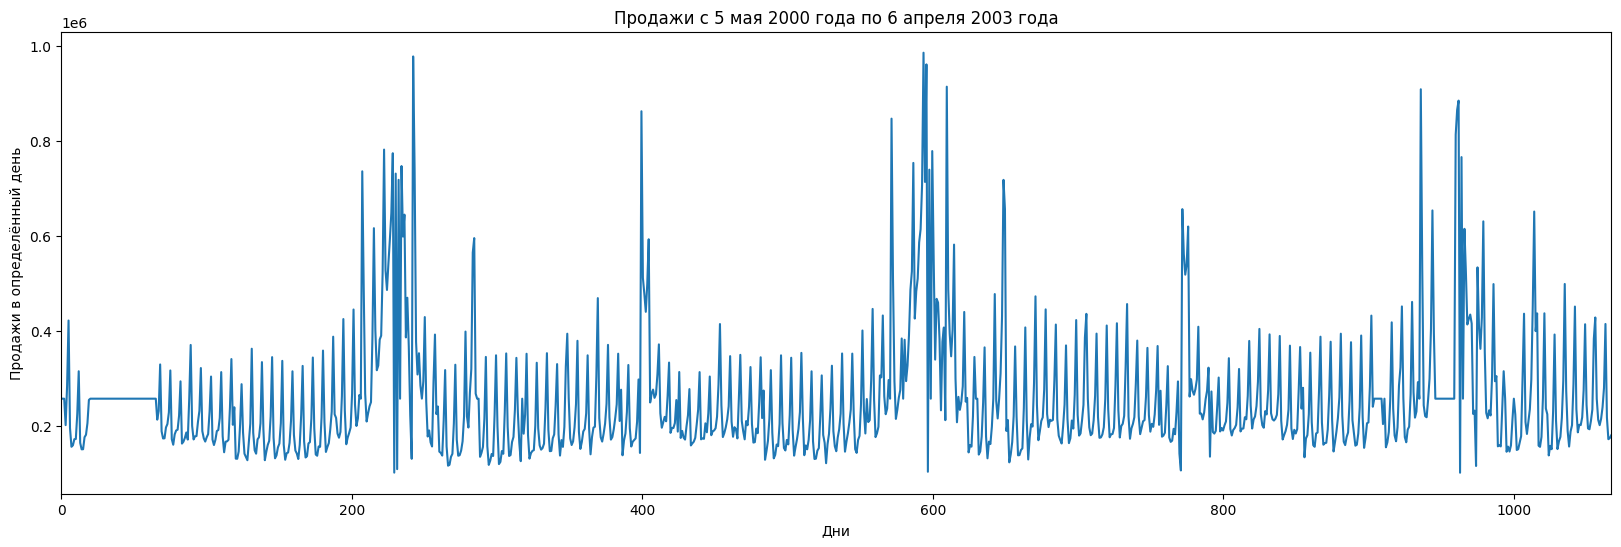

In [22]:
time_axis = np.linspace(0, 1067, len(sales["x"])) 
plt.figure(figsize=(20, 6)) 
plt.plot(time_axis, sales["x"].fillna(sales["x"].mean()))

# заголовки
plt.title('Продажи c 5 мая 2000 года по 6 апреля 2003 года')
plt.xlabel('Дни')
plt.ylabel('Продажи в определённый день')

# команда на отрисовку
plt.xlim(0, 1067)
plt.show()

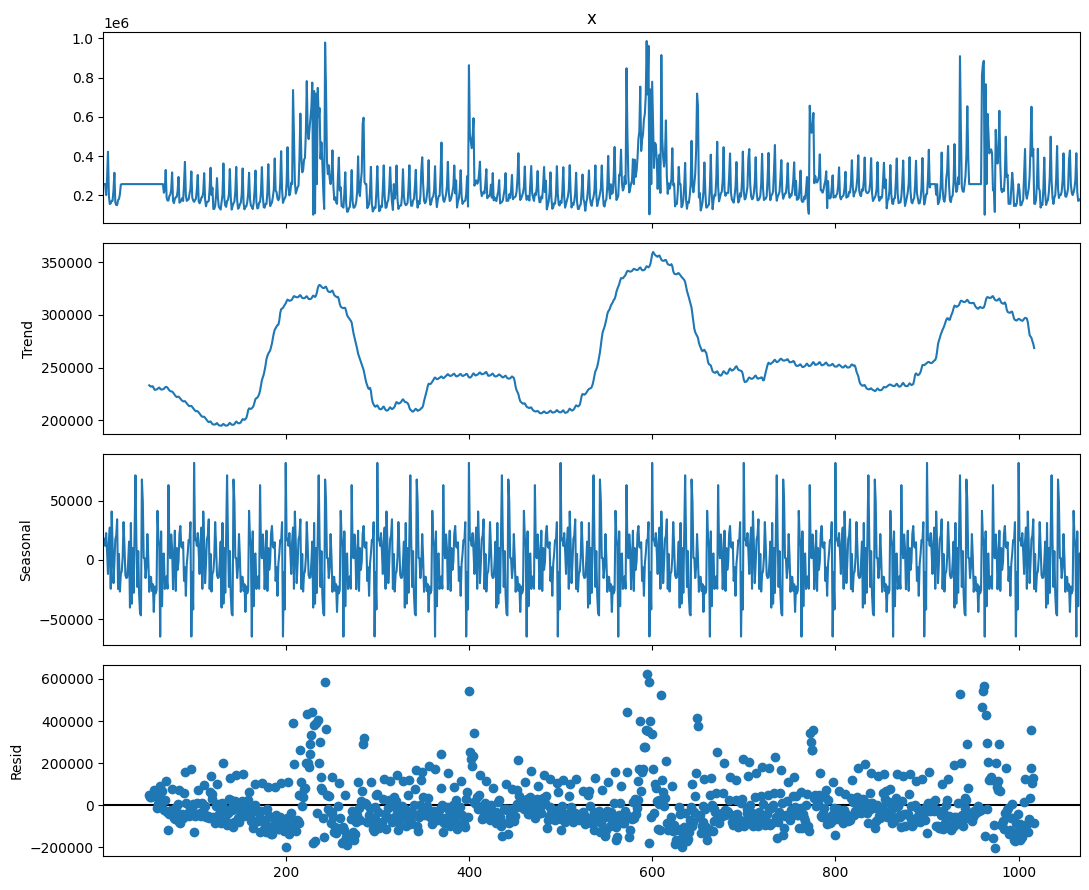

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о продажах
decompose = seasonal_decompose(sales["x"], period=100)
decompose.plot()
plt.show()

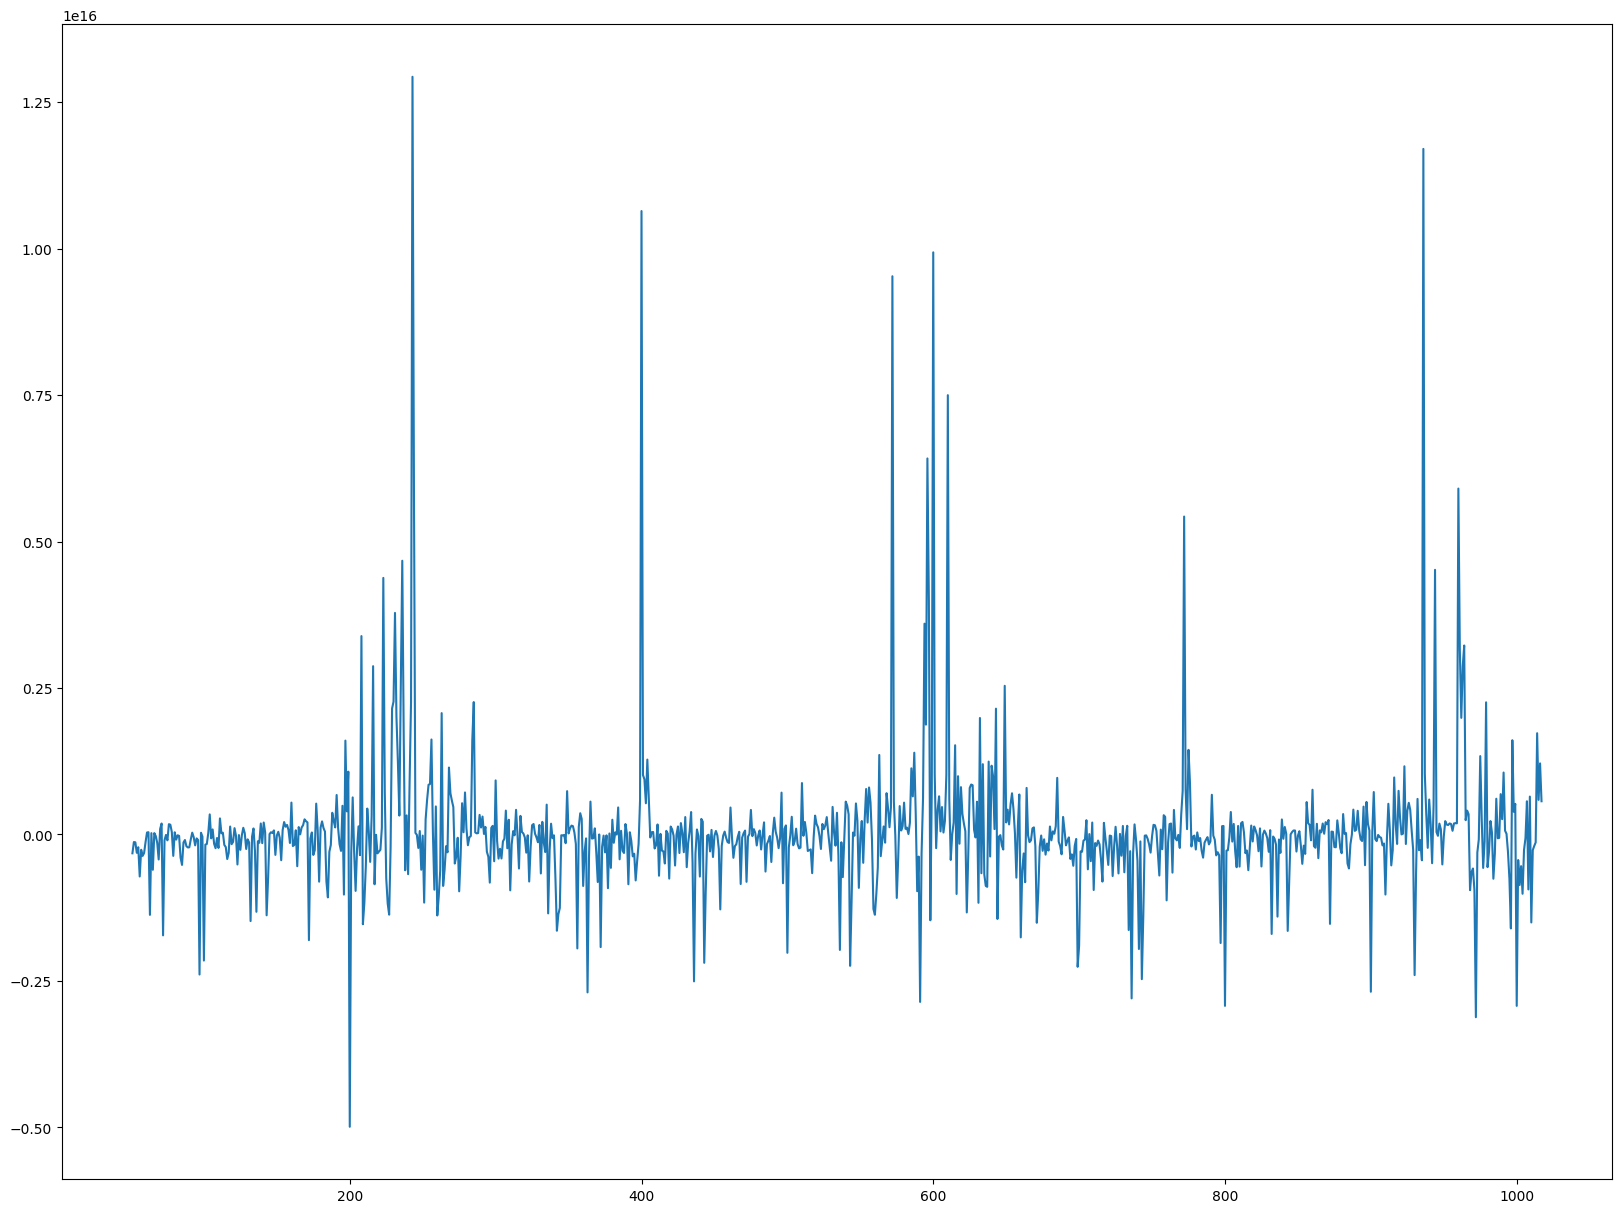

In [25]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

<Axes: >

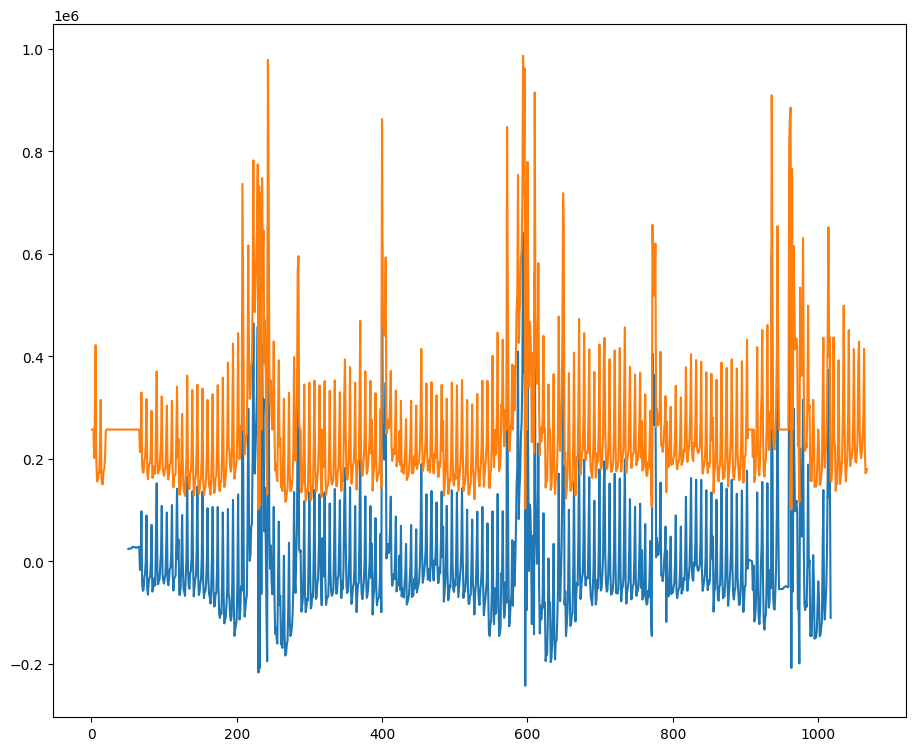

In [26]:
# удаляем компонент тренда из временного ряда...
sales_r = sales["x"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
sales_r.plot()
sales["x"].plot()

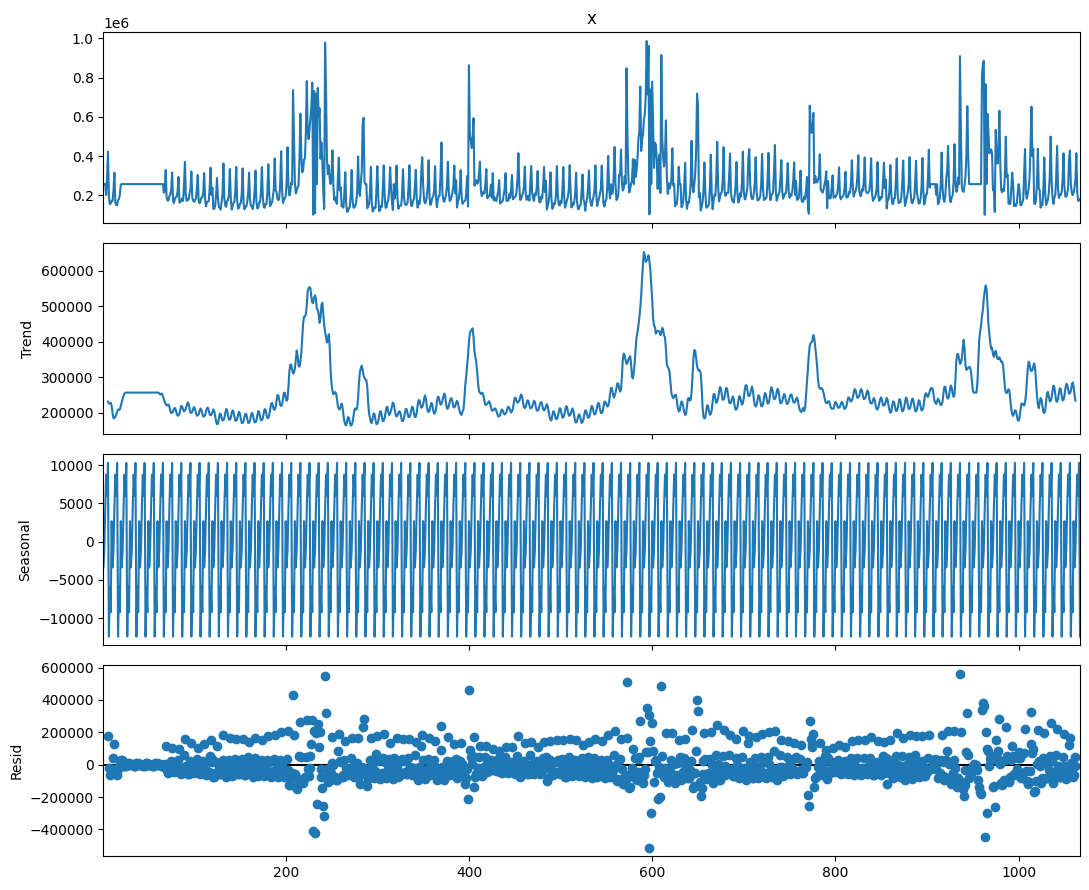

In [27]:
# разложение на составляющие продажи
decompose = seasonal_decompose(sales["x"], period=10, model="additive")
decompose.plot()
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller

# Тест Дики-Фулера
alpha = 0.05
name = "Продажи"
ts = sales["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Продажи :
Test Statistic                   -4.699714
p-value                           0.000084
#Lags Used                       22.000000
Number of Observations Used    1044.000000
Critical Value (1%)              -3.436629
Critical Value (5%)              -2.864312
Critical Value (10%)             -2.568246
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


/tmp/ipykernel_5350/1110318620.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


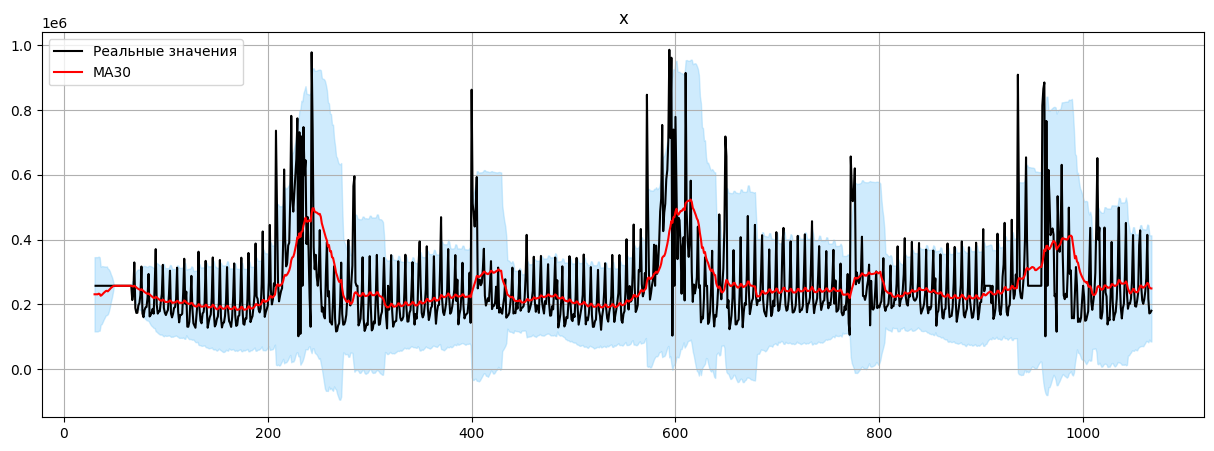

In [30]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

<Figure size 1200x700 with 0 Axes>

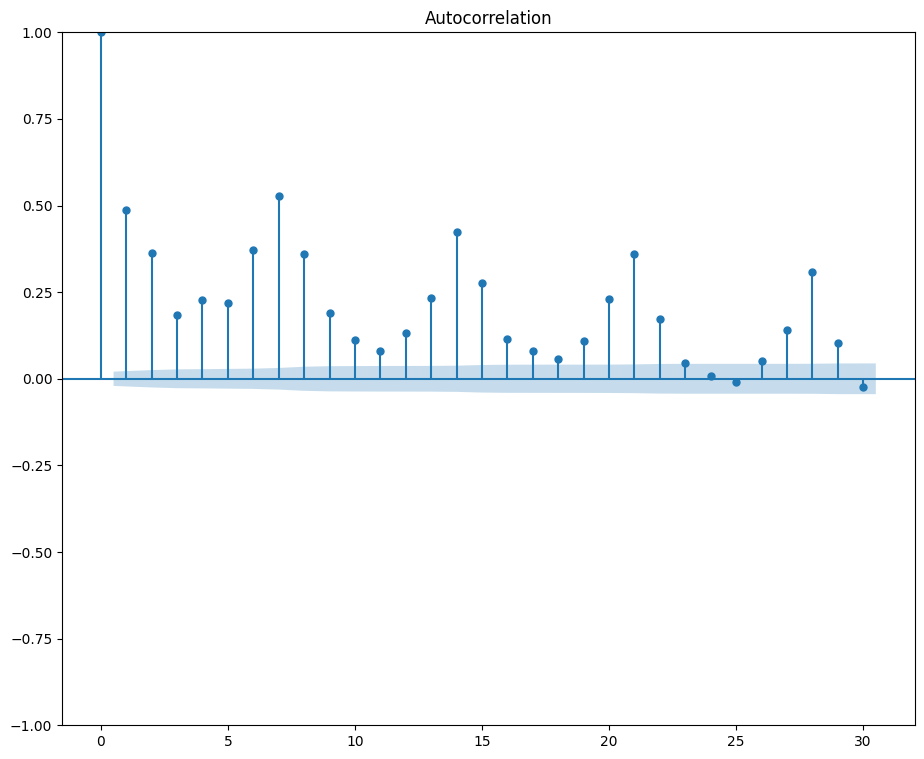

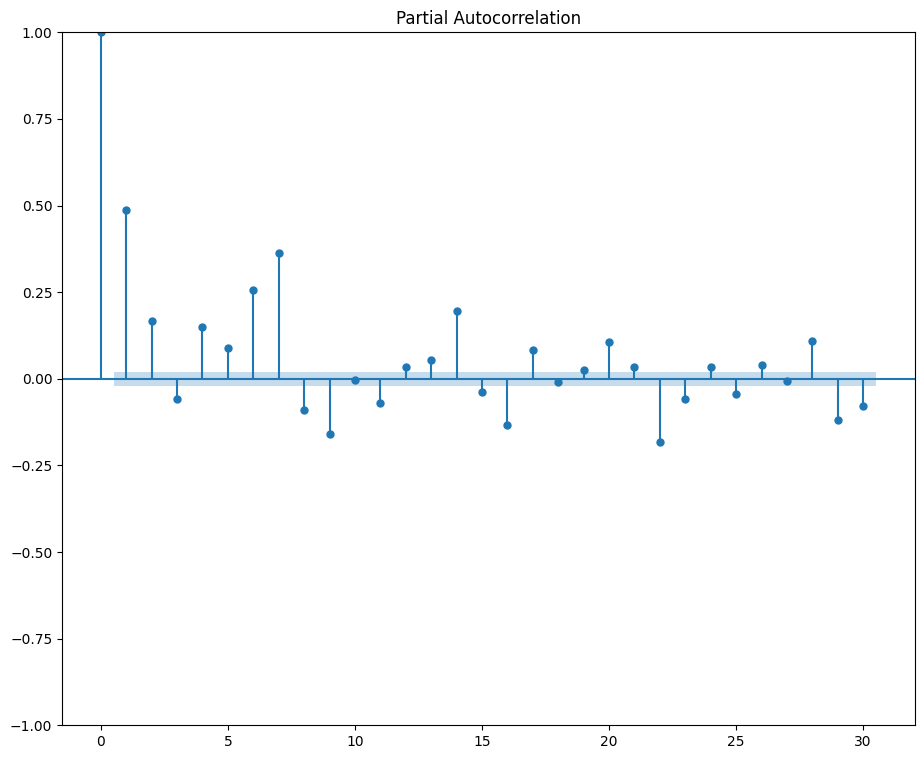

In [31]:
import statsmodels.tsa.api as smt

ts = sales["x"]


fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

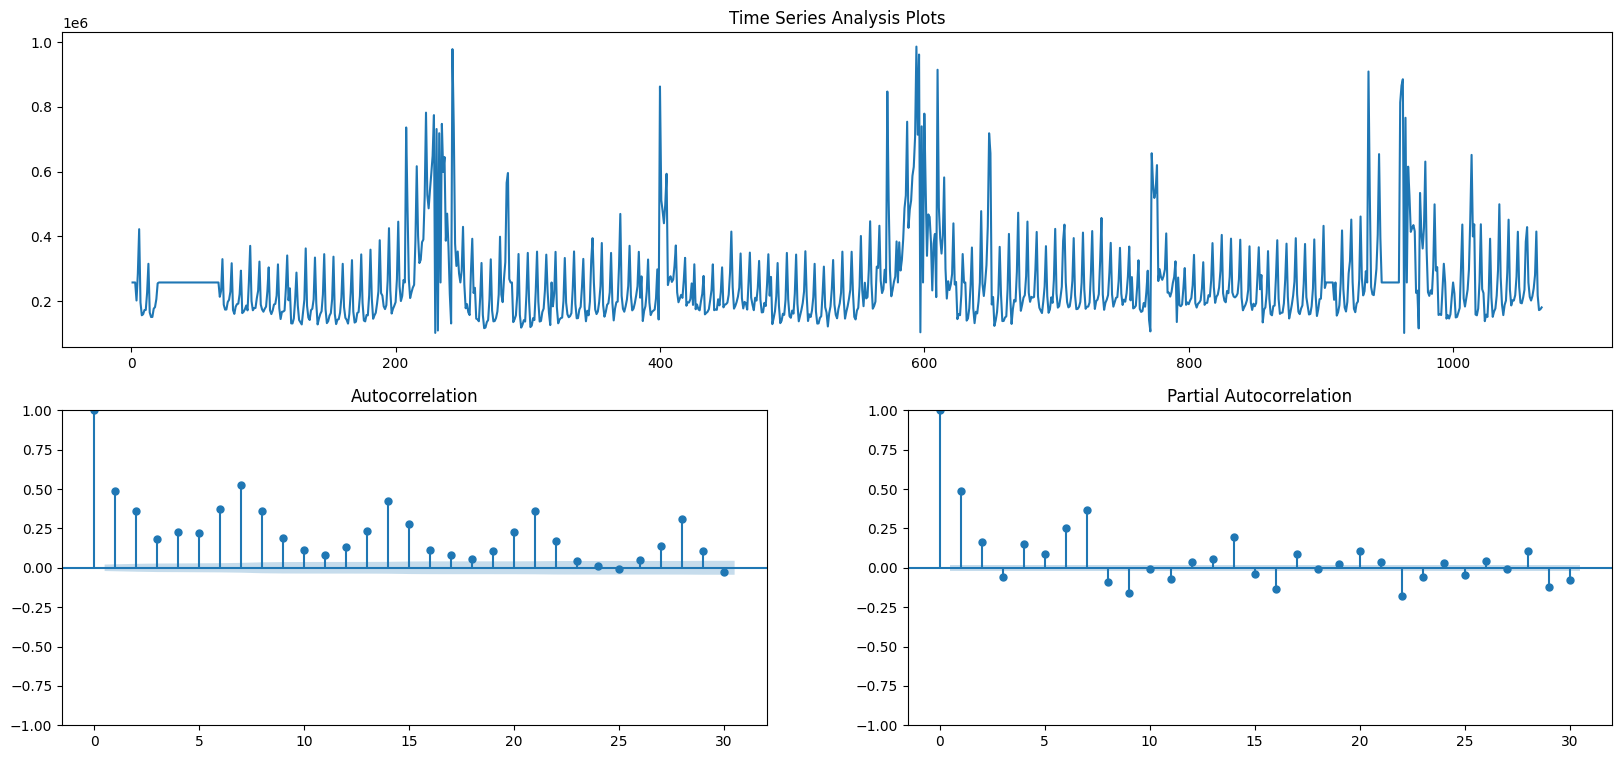

In [32]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None